In [ ]:
romain.jouin@memorandum.pro

# Fondamentaux du Machine Learning

L'objectif majeur du Machine Learning est de prévoir une valeur de sortie en fonction d'un ensemble de valeurs en  entrée. Par exemple, prévoir le prix d'un appartement en fonction du nombre de mètres carrés. 

La problématique principale de cet exercice est que nous ne connaissons jamais tous les paramètres influençant la valeur de sortie. Par exemple pour l'appartement, quid de la ville dans laquelle se situe l'appartement, du numéro de l'étage, de l'orientation des fenêtres, de l'état du parquet, du bruit dans la rue, de l'empressement du propriétaire à vendre ? Tous ces paramètres ne sont pas forcément fournis, et d'autres ne peuvent pas être connus (nombre d'acheteurs potentiels,  vice caché, goût de l'acheteur, 'coup de coeur'...).

Par conséquent nous savons uniquement que nous ne savosn pas tout. Il va falloir faire avec, et s'appuyer sur les mesures que nous avons pour déterminer la variable de sortie. C'est l'objectif du Machine Learning en mode supervisé.

Il existe aussi un Machine Learning non supervisé qui consiste à chercher des ensembles homogènes dans des données. On parle de clustering.

## Régression et classification

Le type de variable de sortie peut être soit un nombre, soit une catégorie (mot, un label). Ce sont deux cas légérement distincts : on parlera de "régression" pour prévoir un nombre (par exemple le prix d'un appartement), et de "classification" pour prévoir une catégorie (par exemple le type d'appartement : "F1 / F2 / F3"...).


## Apprentissage supervisé et non supervisé

Deux grands types d'apprentissage existent : 

1) supervisé : En apprentissage supervisé, nous fournissons des exemples de paires connues entre des mesures (étage, nomnre de mètre carrés, nombre de chambres) et des valeurs de sorties (historique de prix de vente). Nous posons l'hypothèse que dans le futur nous aurons accés aux mesures, sans connaître la variable de sortie. Il va donc falloir apprendre à prévoir la variable de sortie à partie du jeux de mesures que nous prévoyons de recevoir à l'avenir.

2) non supervisé : En apprentissage non supervisé la problématique est différente : nous cherchons à trouver des groupes se ressemblant dans les données fournies. 

## Caractéristiques des algorithmes : biais et variance

Pour un algorithme supervisé, on a en entrée un jeu d'entrainement (où les caractéristiques des appartements et leurs prix sont connus) et un jeu de test (où seuls les caractéristiques des appartements sont donnés à l'algorithme, qui doit alors prévoir le prix).

L'algorithme apprend sur le jeu d'entrainement, et on mesure sa performance sur sa capacité à répondre correctement sur le jeu de test. En plus du fait que tout l'univers n'est pas connu, il y a deux raisons principales qui font que les algorithmes supervisé se trompent : 

1) ils sont biaisés : c'est l'erreur de fait - un algorithme supervisé se trompe, voilà tout. L'erreur est presque indépendante de ce qu'on lui donne en entrée. 

2) ils varient : c'est les changements dans les prédictions selon les données entrées en test (si je ne donne que des appartements à paris pour apprendre et qu'ensuite j'essaie de prévoir des prix à Lyon, l'algorithme va probablement prévoir des prix trop élevés. Par contre si je lui donne en entrée un mix de prix parisiens et lyonnais, alors l'algorithme va sans doute mieux prévoir. C'est donc un algorithme qui varie selon les données d'entrées, on parle de variance.)

On souhaitera donc réduire le biais et la variance.
    

# Import pour Scikit Learn

In [10]:
"""
            IMPORTS
"""
from __future__ import division
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Régression linéaire

En deux dimensions le plus simple est de faire passer une droite entre les poins, selon la méthode des moindres carrés.

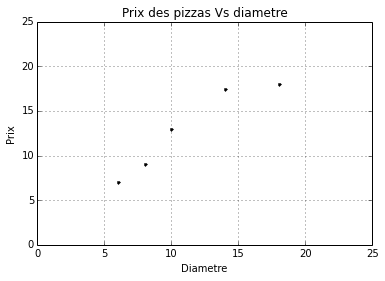

In [86]:
diametres = [[6], [8], [10], [14],   [18]]
prix = [[7], [9], [13], [17.5], [18]]

plt.figure()
plt.title('Prix des pizzas Vs diametre')
plt.xlabel('Diametre')
plt.ylabel('Prix')
plt.plot(diametres, prix, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

## Création et set up d'un modèle

In [87]:
from sklearn.linear_model import LinearRegression
# creation du modele
model = LinearRegression()
# apprentissage
model.fit(diametres, prix)
# question
diametre_a_predire = 12
# prediction :
prediction = model.predict(diametre_a_predire)
#affichage :
print "Pour un diametre de %s on predit un prix de  %.2f"%(diametre_a_predire, prediction)

Pour un diametre de 12 on predit un prix de  13.68


##Utilisation d'un modèle

In [91]:
diametre_a_predire = 25
prevision = model.predict(diametre_a_predire)

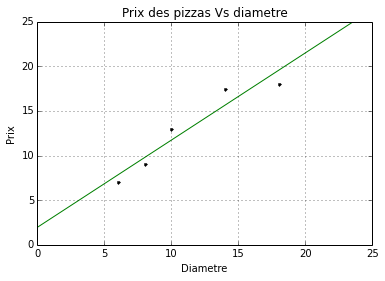

In [92]:
plt.figure()
plt.title('Prix des pizzas Vs diametre')
plt.xlabel('Diametre')
plt.ylabel('Prix')
plt.plot(diametre, prix, 'k.')
plt.plot([[0],  [diametre_a_predire]],[model.intercept_, [prevision]], 'g-')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [89]:
# pente de la doite
print model.coef_

[[ 0.9762931]]


In [79]:
# valeurà zéo : 
print model.intercept_

[ 1.96551724]


In [90]:
# calcul de la prédiction
prediction = model.intercept_ + model.coef_ * diametre_a_predire
prediction

array([[ 13.68103448]])

## Noter le modèle

In [93]:
# valeur d'entrées prédite par le modèle créé : 
model.predict(diametres)

array([[  7.82327586],
       [  9.77586207],
       [ 11.72844828],
       [ 15.63362069],
       [ 19.5387931 ]])

In [99]:
# Erreur de prédiction sur les valeurs d'entrée : 
erreurs = model.predict(diametres) - prix
erreurs

array([[ 0.82327586],
       [ 0.77586207],
       [-1.27155172],
       [-1.86637931],
       [ 1.5387931 ]])

In [106]:
#Erreur moyenne :
square_error = [erreur*erreur for erreur in erreurs ]
moyenne_des_erreurs = np.mean(square_error)
moyenne_des_erreurs

1.7495689655172406

In [109]:
# Scoring du modèle sur les  prix d'apprentissage (méthode r-squared):
model.score(diametres, prix)

0.91000159642401024

##Tester le modèle

In [111]:
# Une fois le modèle appris, nous pouvons le tester sur de nouvelles entrées :
nouveaux_diametres = [[8],  [9],   [11], [16], [12]]
nouveaux_prix = [[11], [8.5], [15], [18], [11]]
# Prediction des prix par les diametres :
model.predict(nouveaux_diametres)

array([[  9.77586207],
       [ 10.75215517],
       [ 12.70474138],
       [ 17.5862069 ],
       [ 13.68103448]])

In [112]:
#Erreur de prédiction:
nouvelles_erreurs = model.predict(nouveaux_diametres)  - nouveaux_prix
nouvelles_erreurs

array([[-1.22413793],
       [ 2.25215517],
       [-2.29525862],
       [-0.4137931 ],
       [ 2.68103448]])

In [113]:
#Nouvelle Erreur moyenne :
square_error = [erreur*erreur for erreur in nouvelles_erreurs ]
moyenne_des_erreurs = np.mean(square_error)
moyenne_des_erreurs


3.8396198721759802

In [114]:
#scoring sur de nouveaux prix:
model.score(nouveaux_diametres, nouveaux_prix)

0.6620052929422553

Le modèle explique 66% de la variance

# Régression linéaire sur plusieurs colonnes

In [1]:
from sklearn.linear_model import LinearRegression
#nouveaux jeu d'apprentissage : 
diametre__nb_ingredients = [[6, 2], [8, 1], [10, 4], [14, 2], [18, 2]]
prix = [[7],    [9],    [13],    [17.5],  [18]]
# création d'un modèle :
model = LinearRegression()
# apprentissage :
model.fit(diametre__nb_ingredients, prix)
# scoring sur le jeu d'apprentissage : 
model.score(diametre__nb_ingredients, prix)

0.93364567605175108

In [2]:
diametre__nb_ingredients_test = [[8, 2], [9, 2], [11, 2], [16, 2], [12, 3]]
prix_test = [[11],   [8.5],  [15],    [18],    [11]]
predictions = model.predict(diametre__nb_ingredients_test)
for i, prediction in enumerate(predictions):
    print 'Prediction: %.2f, Reel: %.2f, Erreur = %.2f' % (prediction[0], prix_test[i][0], prix_test[i][0] - prediction[0] )

Prediction: 9.66, Reel: 11.00, Erreur = 1.34
Prediction: 10.63, Reel: 8.50, Erreur = -2.13
Prediction: 12.57, Reel: 15.00, Erreur = 2.43
Prediction: 17.42, Reel: 18.00, Erreur = 0.58
Prediction: 14.23, Reel: 11.00, Erreur = -3.23


In [3]:
model.score(diametre__nb_ingredients_test, prix_test)

0.59476354155807987

# Régression polynomiale

Nous avons vu une relation linéaire entre les composantes, mais le monde est plus complexe et il est possible que les relations soient polynomiales... représentées par une courbe !

In [200]:
"""
    Préprocessing des vecteurs d'entrée en polynome de degré deux :
"""
# import de la librairie :
from sklearn.preprocessing import PolynomialFeatures
# Création d'un objet de conversion en polynome :
quadratic = PolynomialFeatures(degree=2)
# Préprocessing des diamétres :
diametres_quadratic = quadratic.fit_transform(diametres)
"""
    Création d' un modèle linéaire sur ces features quadratics
"""
modele_lineaire = LinearRegression()
modele_lineaire.fit(diametres_quadratic, prix)
# scoring sur les inputs d'entrée :
modele_lineaire.score(diametres_quadratic, prix)

0.9816421639597428

[0, 25, 0, 25]

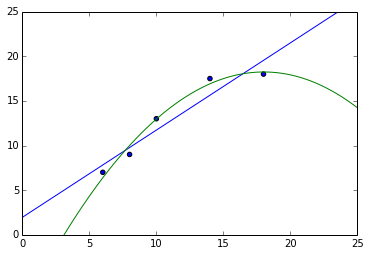

In [199]:
"""
    PLOTTING de tous les prix pour des diamétres entre 0 et 25
""" 
# Création d'un objet de conversion en polynome :
quadratic = PolynomialFeatures(degree=2)

nouveaux_diametres_de_0_a_25 = np.linspace(0,25,100).reshape(100, 1)# un vecteur de prix de 0 à 100 alignés
# Préprocessin des diamètres :
diametres_quadratic_0_a_25  = quadratic.fit_transform(nouveaux_diametres_de_0_a_25)

"""
        Modèle linéaire sur les features linéaires
"""
# on recrée un modèle linéaire
modele_lineaire = LinearRegression()
# on apprend sur les diametres linéaires :
modele_lineaire.fit(diametres, prix)
# on créé une représentation artificielle de ce modèle:
predictions_lineaire = modele_lineaire.predict(nouveaux_diametres_de_0_a_25)

"""
    Modèle linéaire sur les features polynomialisées
"""
#on crée un modèle linéaire sur les features polynomiales
modele_quadratic = LinearRegression()
# on apprend sur les anciens diametres
modele_quadratic.fit(diametres_quadratic, prix)
# on prédit sur les nouveaux :
predictions_quadratic = modele_quadratic.predict(diametres_quadratic_0_a_25) 
"""
    Display
"""
plt.scatter(diametres, prix)
plt.plot(diametres_de_0_a_25,predictions_lineaire)# affichage
plt.plot(diametres_de_0_a_25,predictions_quadratic)
plt.axis([0,25,0,25])


# Classification

## Mesure de performance dans la classification

Une erreur de prédiction est plus ou moins grave : se tromper sur le diagnostic d'un cancer ou sur le prix d'une pizza n'a pas la même conséquence. Par conséquent il faudra trouver des moyens de pénaliser les erreurs aux conséquences les plus graves dans la vie réelle. C'est l'enjeu d'un set up métier.

Pour les tâches de classification, l existe des mesures de performances qui sont indépendantes de cet environnement. Imaginons une classification des tumeurs en 'cancerreuse', 'non cancerreuse', on peut alors calculer : 

a) les vrais positifs : le nombre de cellule classées cancerreuse, et réellement cancerreuse 

b) les vrais négatifs : le nombre de celluls classées non cancerreuse, et réellement non cancereuses

c) les faux positifs : le nombre de cellule classées cancerreuse, alors qu'elles ne l'étaient pas

d) les faux négatifs : le nombre de cellule classées non cancerreuses, alors qu'elles l'étaient.

Visiblement, nous cherchons un maximum de (a) et (b). Par contre (c) peut induire des examens médicaux en trop, mais est moins génant que (d) où l'on risque de ne plus s'occuper d'un malade que l'on a déclaré sain.

Ainsi on calcul différentes mesures de la qualité de la prédiction à partir de ces 4 chiffres : 
1) l'accuité : c'est le nombre de bonne réponses (a+b) divisés par le nombre de réponses 

2) la précision : c'est, quand l'algorithme donne un résultat positif, le pourcentage de fois qu'il a raison. Les résultats positifs sont les "vrais positifs" (a) et les "faux positifs" (c). En divisant (a) par (a+c) on a une mesure de la confiance que l'on peut donner à l'algotihme : quand il me dit qu'il y a un cancer, il a raison à n%. On parle de précision.

3) Le rappel : on calcul le nombre de tumeurs cancerreuse réelle : c'est les vrais positifs + les faux négatifs (a+d). Et on divise le nombre de tumeurs déclarés cancerreuse par le nombre réel de cellule cancerreuse (a). On obtient donc (a /(a+d)), c'est le rappel : le pourcentage de cellule cancerreuse effectivement trouvé.

# Perceptron

Le perceptron est un algorithme de classification binaire sur des classes O / 1. Il utilise un neurone pour prendre sa décision. Un neurone est une fonction qui prend en paramètre plusieurs entrées, et calcule une sortie. 

sortie = activation_function( sum ( wi *xi) + b )

xi sont les entrées (valeurs des variables : diamètre des pizzas)
wi sont les paramètres du modèles (changera à chaque tour)
b est le biais (constante)
activation_function : type de neurone choisi (fonction utilisée : heaviside step : on prédit "classe 1" si la somme > 0, "classe 0" sinon.)

Le perceptron lit les entrées une à une, et corrige ses poids w à chaque ligne. Au début les wi sont mis proches de 0, et la valeur prédite est comparée au réel. 
On update les poids selon la formule : 

prochain_wi = wi_actuel + taux_d_apprentissage * ( vrai_classe - prédiction ) * valeur_de_la_feature

On voit que l'erreur est calculée : vrai_classe - prédiction. Si la prédiction est vraie, alors l'erreur vaut 0 et dans ce cas le prochain_wi vaudra le wi_actuel.
Sinon l'erreur vaut 1 et alors on multiplie la valeur de la feature par le taux_d_apprentissage, que l'on ajoute au paramètre actuel. Ainsi le wi s'incrémente-t-il d'un pourcentage du poids de la valeur de la feature.

Ce système est fait pour chaque ligne, et les poids varient d'une ligne à l'autre. C'est un apprentissage quasi en ligne.






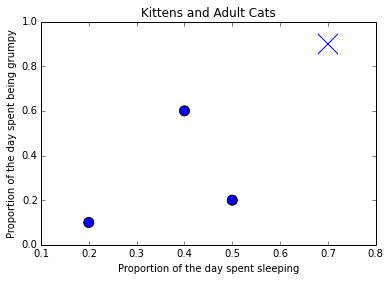

In [215]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
    [0.2, 0.1],
    [0.4, 0.6],
    [0.5, 0.2],
    [0.7, 0.9]
])

y = [0, 0, 0, 1]

markers = ['.', 'x']
plt.scatter(X[:3, 0], X[:3, 1], marker='.', s=400)
plt.scatter(X[3, 0], X[3, 1], marker='x', s=400)
plt.xlabel('Proportion of the day spent sleeping')
plt.ylabel('Proportion of the day spent being grumpy')
plt.title('Kittens and Adult Cats')
plt.show()


Starting epoch 1
-- Epoch 1
Norm: 0.42, NNZs: 2, Bias: 0.000000, T: 4, Avg. loss: 0.455000
Total training time: 0.00 seconds.
[ 0.] [[-0.3 -0.3]]


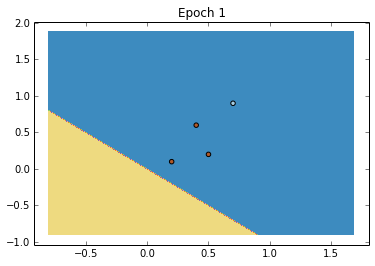


Starting epoch 2
-- Epoch 1
Norm: 0.42, NNZs: 2, Bias: 0.000000, T: 4, Avg. loss: 0.455000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 2, Bias: 0.000000, T: 8, Avg. loss: 0.385000
Total training time: 0.00 seconds.
[ 0.] [[-0.5 -1. ]]


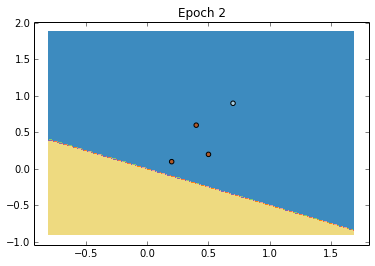


Starting epoch 3
-- Epoch 1
Norm: 0.42, NNZs: 2, Bias: 0.000000, T: 4, Avg. loss: 0.455000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.12, NNZs: 2, Bias: 0.000000, T: 8, Avg. loss: 0.385000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.95, NNZs: 2, Bias: 1.000000, T: 12, Avg. loss: 0.273333
Total training time: 0.00 seconds.
[ 1.] [[-0.3 -0.9]]
converged in epoch 3


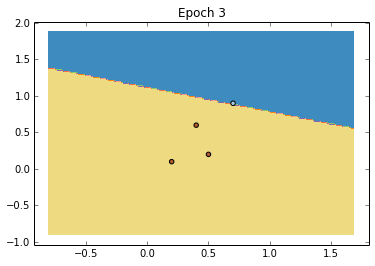

In [214]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np

X = np.array([
    [0.2, 0.1],
    [0.4, 0.6],
    [0.5, 0.2],
    [0.7, 0.9]
])
X_test = np.array([
    [0.7, 0.8]
])

Y = np.array([1, 1, 1, 0])
h = 0.02

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
fig = plt.figure()

for e in range(1, 7):
    print '\nStarting epoch', e
    clf = Perceptron(n_iter=e, verbose=5).fit(X, Y)
    print clf.intercept_, clf.coef_
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # fig.add_subplot(1, 5, e)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    # ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.title('Epoch %s' % e)

    if clf.score(X, Y) == 1:
        print 'converged in epoch', e
        break
    plt.show()

# Arbre de décision

Un arbre de décision pose des questions les une à la suite des autres. Il faut trouver des questions pertinentes : qui permettent de cataloguer les éléments, sans trop les exclure. 

A chaque étape nous aurons un mixte de différentes classes. Les meilleures questions sont celles qui réduisent ce mixte. Nous pouvons le mesurer par la mesure de l'entropie.

Pour chaque niveau de l'arbre nous pouvons mesurer l'entropie des feuilles : 

entropie origine =  - sum ( proba( classe) * log (proba(classe) )  )

Ensuite nous créons des questions pour diminuer l'entropie. Nous pouvons calculer l'entropie de chaque feuille :

entropie d'une feuille =  - sum ( proba( classe) * log (proba(classe) )  )

Une trop bonne question peut poser problème : si on a un sous-set avec 1 seul élément, son entropie passe à 0 (on est sûr de la réponse). Par contre l'entropie de l'autre côté ne baissera que très peu.
Il faut donc trouver un bon équilibre. On parle de "Gain d'information". 

Le gain d'information est une comparaison entre l'entropie du noeud précédent et celui du noeud créé en dessous.

gain d'information
= 
entropie( niveau au dessus) - sum (entropy(chaque_niveau_en_dessous) * nb_variable_du_niveau_inferieur / nb_de_variable_du_niveau_superieur )

On cherchera donc des arbres qui trouvent un bon compromis entre une réduction de l'entropie et un gain d'information.



Il faut réduire l'entropy de chaque sous-set.


In [369]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
X, y = datasets.make_classification(n_samples=1000, n_features=20)
dt = DecisionTreeClassifier()
dt.fit(X, y)
preds = dt.predict(X)
(y == preds).mean()

1.0

In [370]:
def several_decision_tree(n_tree, X, y, n_col =5):
    import math
    import time
    debut = time.time()
    training = np.random.choice([True, False], p=[0.75, 0.25], size=len(y))
    n_ligne = int(math.ceil(n_tree/n_col))
    f, ax = plt.subplots(n_ligne, n_col, figsize=(2*n_col, 2*n_ligne) )
    plt.subplots_adjust(wspace = .4)
    plt.subplots_adjust(hspace = .4)
    accuracies = []
    tree_index = 0
    n_features = X.shape[1]
    for depth in np.arange(1, n_tree+1):
        dt = DecisionTreeClassifier(max_depth=depth)
        dt.fit(X[training], y[training])
        preds = dt.predict(X[~training])
        accuracy = (preds == y[~training]).mean()
        accuracies.append(accuracy)
        ne0 = dt.feature_importances_!=0
        vrai = [x for x in ne0 if x]
        y_comp = dt.feature_importances_[ne0]
        x_comp = np.arange(len(dt.feature_importances_))[ne0]
        r = "A %.3f "%(accuracy,)
        
        local_ligne = math.floor(tree_index/n_col)
        local_col = tree_index - n_col *local_ligne
        
        ax[local_ligne][local_col].set_xlim(0,20)
        
        ax[local_ligne][local_col].set_ylim( 0,1)
        ax[local_ligne][local_col].set_title(r)
        ax[local_ligne][local_col].bar(x_comp, y_comp, align='center')
        tree_index += 1
    f, ax = plt.subplots(figsize=(7,5))
    ax.plot(range(1, n_tree+1), accuracies)

    duree = time.time()-debut
    print "best tree = %s with accuracy = %s "%(accuracies.index(max(accuracies)), max(accuracies))
    print "%s tree in %.2f sec"%(n_tree, duree)

best tree = 3 with accuracy = 0.953781512605 
6 tree in 0.39 sec
best tree = 1 with accuracy = 0.936758893281 
10 tree in 0.59 sec
best tree = 1 with accuracy = 0.948 
20 tree in 1.08 sec


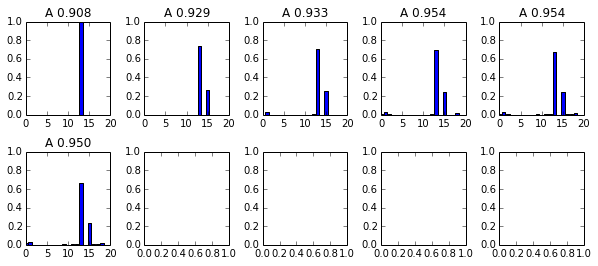

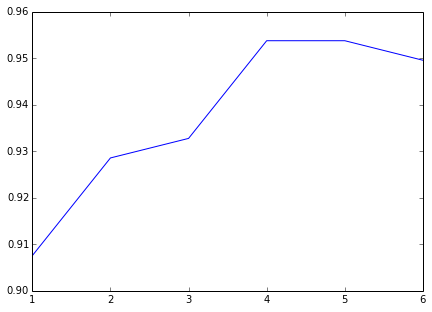

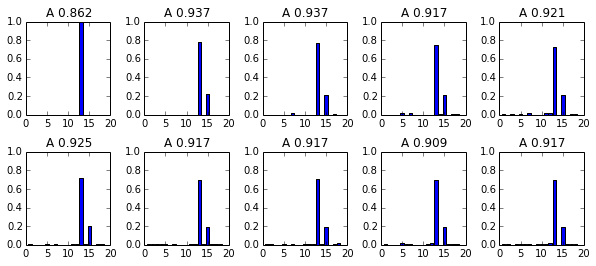

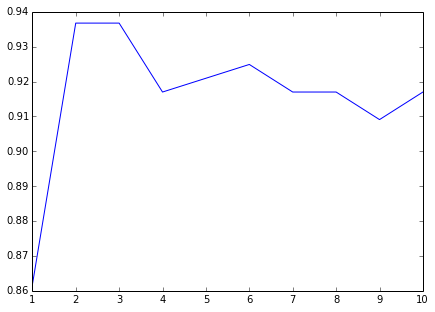

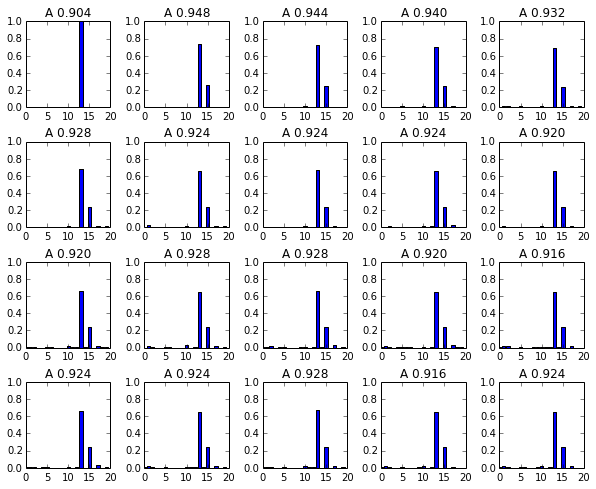

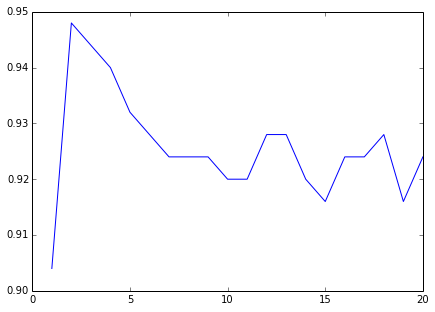

In [372]:
several_decision_tree(6, X, y)
several_decision_tree(10, X, y)
several_decision_tree(20, X, y)

# Utiliser des Forêts d'arbre

Les classifieurs font des erreurs de biais et de variance. Chacun à sa manière. Pour améliorer la prédiction, il est préférable de demander à plusieurs arbre qu'elle est sa prédiction, et de faire une moyenne des prédictions. C'est l'un des principes des forêts aléatoires.

In [374]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X,y)
print (y==forest.predict(X)).mean()


0.994


Feature ranking:
1. feature 13 (0.456400)
2. feature 1 (0.168063)
3. feature 16 (0.151131)
4. feature 15 (0.090905)
5. feature 17 (0.014483)
6. feature 3 (0.012531)
7. feature 19 (0.011692)
8. feature 11 (0.010608)
9. feature 12 (0.010331)
10. feature 18 (0.009422)


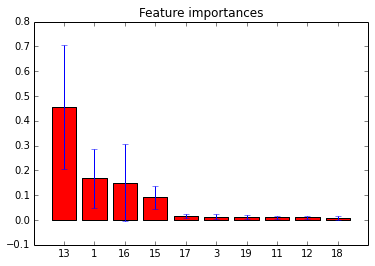

In [380]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices][:10],color="r", yerr=std[indices][:10], align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()